In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

##Equalização adaptativa

In [112]:
def equalizacao_adaptativa(imagem):
  B, G, R = cv2.split(imagem)
  B = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8)).apply(B)
  G = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8)).apply(G)
  R = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8)).apply(R)
  nova_imagem = cv2.merge([B, G, R])
  return nova_imagem

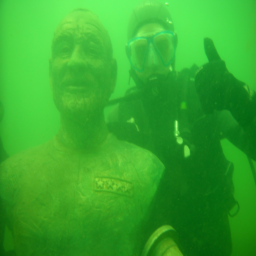

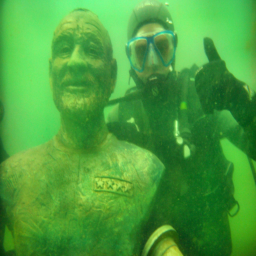

In [113]:
imagem = cv2.imread('1.png')
nova_imagem = equalizacao_adaptativa(imagem)
cv2_imshow(imagem)
cv2_imshow(nova_imagem)

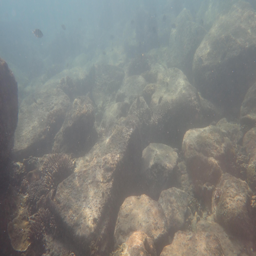

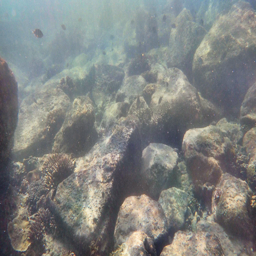

In [114]:
imagem = cv2.imread('42.png')
nova_imagem = equalizacao_adaptativa(imagem)
cv2_imshow(imagem)
cv2_imshow(nova_imagem)

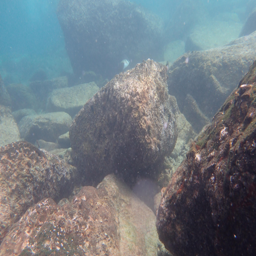

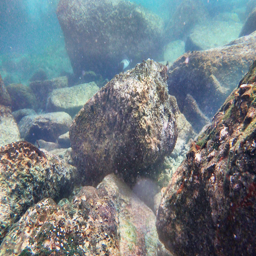

In [115]:
imagem = cv2.imread('38.png')
nova_imagem = equalizacao_adaptativa(imagem)
cv2_imshow(imagem)
cv2_imshow(nova_imagem)

##Transformação linear

In [10]:
def transformacao_linear(imagem):
  B, G, R = cv2.split(imagem)
  def max_min(img):
    max = 0
    for i in img:
      for j in i:
        if j > max:
          max = j
    min = max
    for i in img:
      for j in i:
        if j < min:
          min = j
    return max, min
  Bmax, Bmin = max_min(B)
  Gmax, Gmin = max_min(G)
  Rmax, Rmin = max_min(R)
  gmax = 255
  gmin = 0
  for i in range(len(B)):
    for j in range(len(B[i])):
      g = (gmax - gmin)/(Bmax - Bmin)*(B[i][j] - Bmin) + gmin
      B[i][j] = g
  for i in range(len(G)):
    for j in range(len(G[i])):
      g = (gmax - gmin)/(Gmax - Gmin)*(G[i][j] - Gmin) + gmin
      G[i][j] = g
  for i in range(len(R)):
    for j in range(len(R[i])):
      g = (gmax - gmin)/(Rmax - Rmin)*(R[i][j] - Rmin) + gmin
      R[i][j] = g
  nova_imagem = cv2.merge([B, G, R])
  return nova_imagem

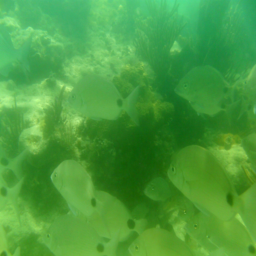

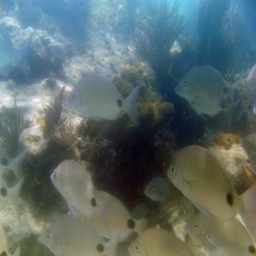

In [ ]:
imagem = cv2.imread('2.png')
cv2_imshow(imagem)
nova_imagem = transformacao_linear(imagem)
cv2_imshow(nova_imagem)

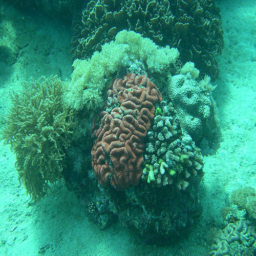

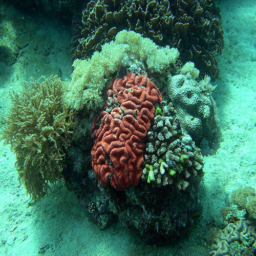

In [46]:
imagem = cv2.imread('13.png')
cv2_imshow(imagem)
nova_imagem = transformacao_linear(imagem)
cv2_imshow(nova_imagem)

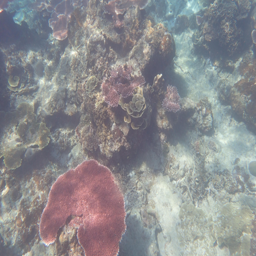

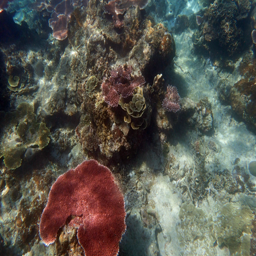

In [49]:
imagem = cv2.imread('33.png')
cv2_imshow(imagem)
nova_imagem = transformacao_linear(imagem)
cv2_imshow(nova_imagem)

##Máscara de nitidez

In [ ]:
nitidez_kernel = [[0, -1, 0], [-1, 5, -1], [0, -1, 0]]

In [ ]:
from math import ceil

def aplica_filtro(imagem, kernel):
  n = len(kernel)
  nova_imagem = np.ones([imagem.shape[0], imagem.shape[1]])
  for i in range(len(imagem)):
    for j in range(len(imagem[i])):
      soma = 0
      if (i + n >= len(imagem)):
        break
      matriz_img = []
      for x in range(i, i + n):
        linha = []
        if (j + n >= len(imagem[i])):
          break
        for y in range(j, j + n):
          linha.append(imagem[x][y])
        matriz_img.append(linha)
      if len(matriz_img) > 0:
        for k in range(len(kernel)):
          for l in range(len(kernel[k])):
            soma = soma + kernel[k][l]*matriz_img[k][l]
        x_y = ceil(n/2) - 2
        nova_imagem[x - x_y][y - x_y] = soma
  return nova_imagem

In [ ]:
def mascara_nitidez(imagem):
  B, G, R = cv2.split(imagem)
  B = aplica_filtro(B, nitidez_kernel)
  G = aplica_filtro(G, nitidez_kernel)
  R = aplica_filtro(R, nitidez_kernel)
  nova_imagem = cv2.merge([B, G, R])
  return nova_imagem

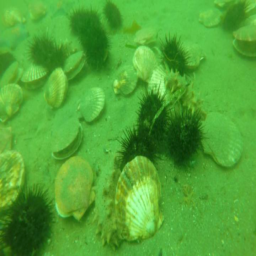

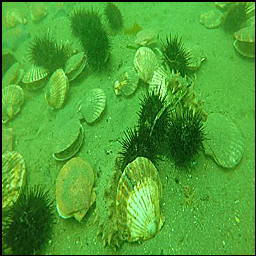

In [ ]:
imagem = cv2.imread('5.png')
nova_imagem = mascara_nitidez(imagem)
cv2_imshow(imagem)
cv2_imshow(nova_imagem)

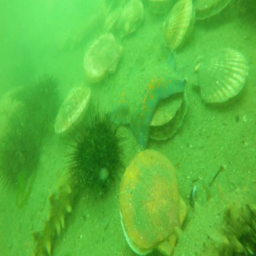

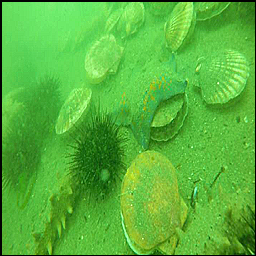

In [ ]:
imagem = cv2.imread('6.png')
nova_imagem = mascara_nitidez(imagem)
cv2_imshow(imagem)
cv2_imshow(nova_imagem)

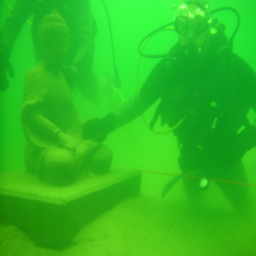

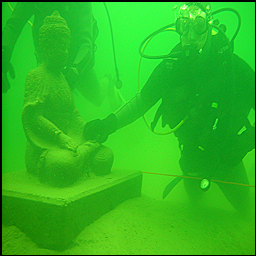

In [ ]:
imagem = cv2.imread('8.png')
nova_imagem = mascara_nitidez(imagem)
cv2_imshow(imagem)
cv2_imshow(nova_imagem)

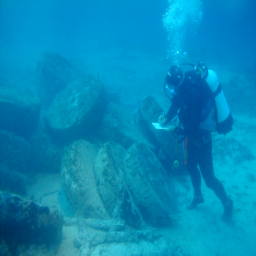

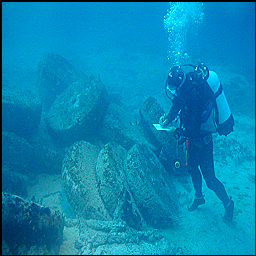

In [103]:
imagem = cv2.imread('26.png')
nova_imagem = mascara_nitidez(imagem)
cv2_imshow(imagem)
cv2_imshow(nova_imagem)

##Aumento da nitidez e suavização

In [89]:
kernel_gaussiano = [[0.077847, 0.123317, 0.077847], [0.123317, 0.195346, 0.123317], [0.077847, 0.123317, 0.077847]]

In [ ]:
def mascara_gaussiana(imagem):
  B, G, R = cv2.split(imagem)
  B = aplica_filtro(B, kernel_gaussiano)
  G = aplica_filtro(G, kernel_gaussiano)
  R = aplica_filtro(R, kernel_gaussiano)
  nova_imagem = cv2.merge([B, G, R])
  return nova_imagem

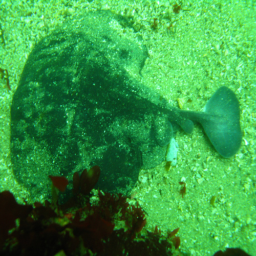

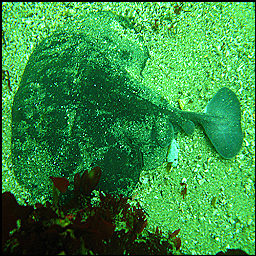

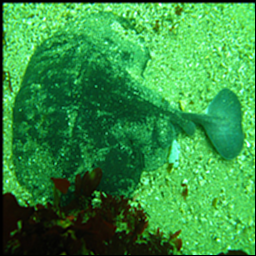

In [ ]:
imagem = cv2.imread('15.png')
cv2_imshow(imagem)
nova_imagem = mascara_nitidez(imagem)
cv2_imshow(nova_imagem)
nova_imagem = mascara_gaussiana(nova_imagem)
cv2_imshow(nova_imagem)

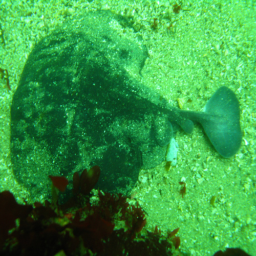

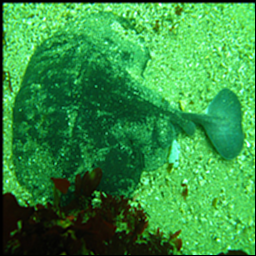

In [ ]:
cv2_imshow(imagem)
cv2_imshow(nova_imagem)

##Correção de cor

In [7]:
def correcao_cor(imagem):
    B, G, R = cv2.split(imagem)
    BMax = np.max(B)
    BMin = np.min(B)
    BMedia = np.mean(B)
    GMax = np.max(G)
    GMin = np.min(G)
    GMedia = np.mean(G)
    RMax = np.max(R)
    RMin = np.min(R)
    RMedia = np.mean(R)
    if (BMedia <= 128):
      for i in range(len(B)):
        for j in range(len(B[i])):
          B[i][j] = (B[i][j] - BMedia)*((BMin - 128)/(BMin - BMedia)) + 128
    else:
      for i in range(len(B)):
        for j in range(len(B[i])):
          B[i][j] = (B[i][j] - BMedia)*((BMax - 128)/(BMax - BMedia)) + 128
    if (GMedia <= 128):
      for i in range(len(G)):
        for j in range(len(G[i])):
          G[i][j] = (G[i][j] - GMedia)*((GMin - 128)/(GMin - GMedia)) + 128
    else:
      for i in range(len(G)):
        for j in range(len(G[i])):
          G[i][j] = (G[i][j] - GMedia)*((GMax - 128)/(GMax - GMedia)) + 128
    if (RMedia <= 128):
      for i in range(len(R)):
        for j in range(len(R[i])):
          R[i][j] = (R[i][j] - RMedia)*((RMin - 128)/(RMin - RMedia)) + 128
    else:
      for i in range(len(R)):
        for j in range(len(R[i])):
          R[i][j] = (R[i][j] - RMedia)*((RMax - 128)/(RMax - RMedia)) + 128
    return cv2.merge([B, G, R])

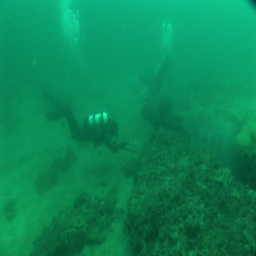

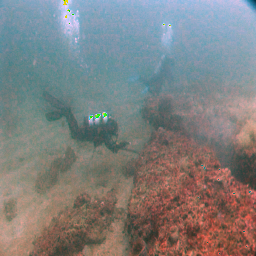

In [76]:
imagem = cv2.imread('4.png')
nova_imagem = correcao_cor(imagem)
cv2_imshow(imagem)
cv2_imshow(nova_imagem)

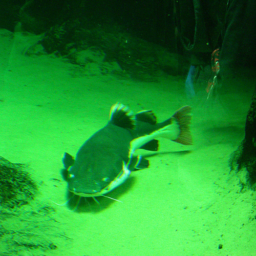

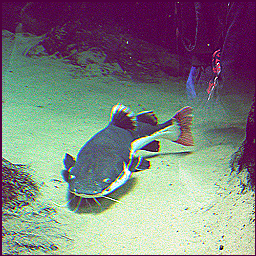

In [68]:
imagem = cv2.imread('14.png')
nova_imagem = mascara_nitidez(imagem)
nova_imagem = correcao_cor(nova_imagem)
cv2_imshow(imagem)
cv2_imshow(nova_imagem)

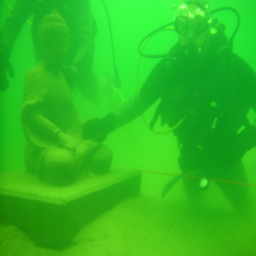

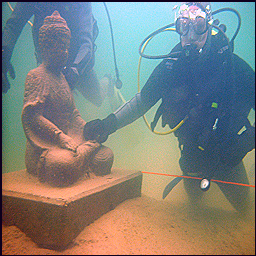

In [69]:
imagem = cv2.imread('8.png')
nova_imagem = mascara_nitidez(imagem)
nova_imagem = correcao_cor(nova_imagem)
cv2_imshow(imagem)
cv2_imshow(nova_imagem)

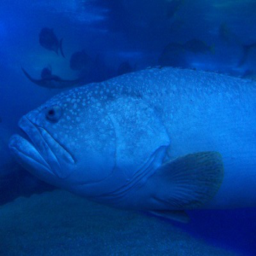

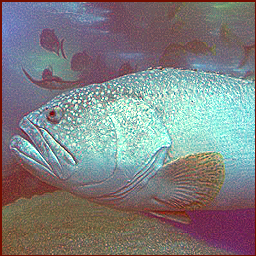

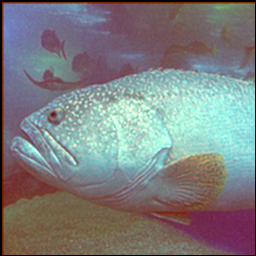

In [132]:
imagem = cv2.imread('30.png')
cv2_imshow(imagem)
nova_imagem = mascara_nitidez(imagem)
nova_imagem = correcao_cor(nova_imagem)
cv2_imshow(nova_imagem)
nova_imagem = mascara_gaussiana(nova_imagem)
cv2_imshow(nova_imagem)

##Equalização padrão

In [73]:
def equalizacao_padrao(imagem):
  B, G, R = cv2.split(imagem)
  B = cv2.equalizeHist(B)
  G = cv2.equalizeHist(G)
  R = cv2.equalizeHist(R)
  nova_imagem = cv2.merge([B, G, R])
  return nova_imagem

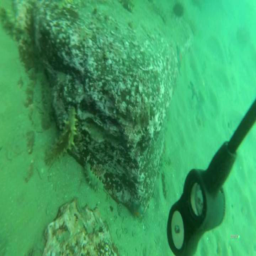

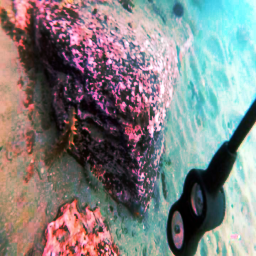

In [75]:
imagem = cv2.imread('9.png')
nova_imagem = equalizacao_padrao(imagem)
cv2_imshow(imagem)
cv2_imshow(nova_imagem)

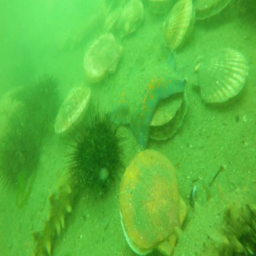

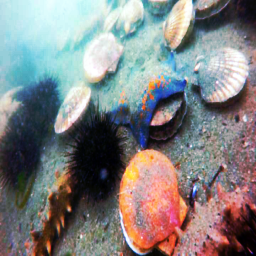

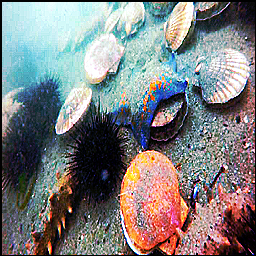

In [79]:
imagem = cv2.imread('6.png')
cv2_imshow(imagem)
nova_imagem = equalizacao_padrao(imagem)
cv2_imshow(nova_imagem)
nova_imagem = mascara_nitidez(nova_imagem)
cv2_imshow(nova_imagem)

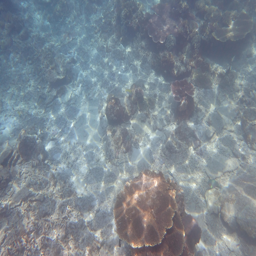

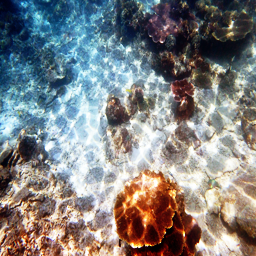

In [84]:
imagem = cv2.imread('34.png')
nova_imagem = equalizacao_padrao(imagem)
cv2_imshow(imagem)
cv2_imshow(nova_imagem)

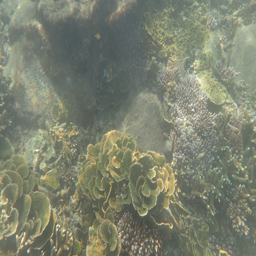

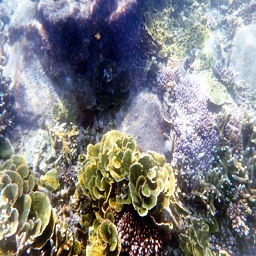

In [85]:
imagem = cv2.imread('40.png')
nova_imagem = equalizacao_padrao(imagem)
cv2_imshow(imagem)
cv2_imshow(nova_imagem)

##Ajuste do brilho/contraste

In [18]:
def brilho_contraste(imagem, alfa, beta):
  nova_imagem = np.ones(imagem.shape, imagem.dtype)
  for i in range(len(imagem)):
      for j in range(len(imagem[i])):
          for k in range(imagem.shape[2]):
              nova_imagem[i,j,k] = np.clip(alfa*imagem[i,j,k] + beta, 0, 255)
  return nova_imagem

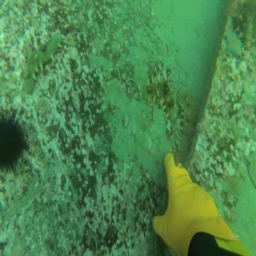

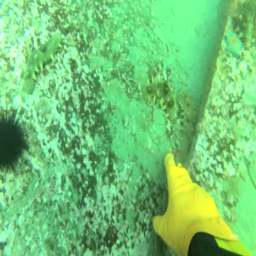

In [52]:
imagem = cv2.imread('10.png')
nova_imagem = brilho_contraste(imagem, 1.5, 1)
cv2_imshow(imagem)
cv2_imshow(nova_imagem)

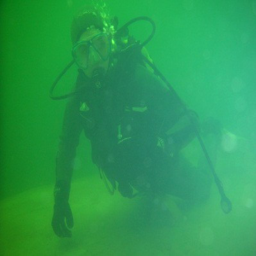

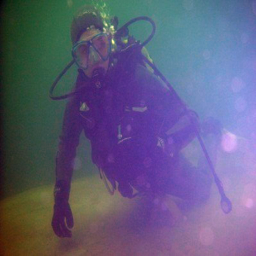

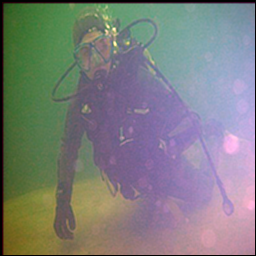

In [101]:
imagem = cv2.imread('11.png')
cv2_imshow(imagem)
nova_imagem_1 = transformacao_linear(imagem)
cv2_imshow(nova_imagem_1)
nova_imagem_2 = mascara_nitidez(imagem)
nova_imagem_2 = correcao_cor(nova_imagem_2)
nova_imagem_2 = mascara_gaussiana(nova_imagem_2)
cv2_imshow(nova_imagem_2)

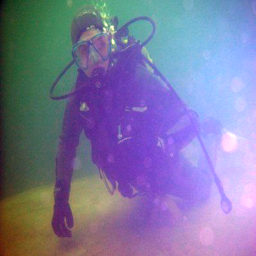

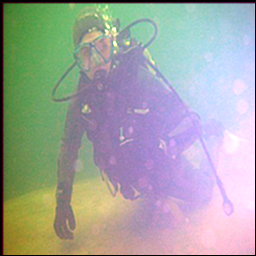

In [102]:
nova_imagem_1 = brilho_contraste(nova_imagem_1, 1.3, 1)
nova_imagem_2 = brilho_contraste(nova_imagem_2, 1.3, 1)
cv2_imshow(nova_imagem_1)
cv2_imshow(nova_imagem_2)

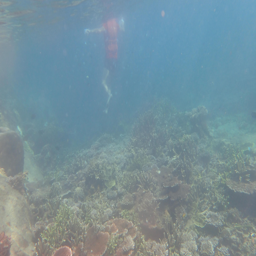

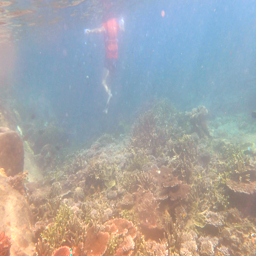

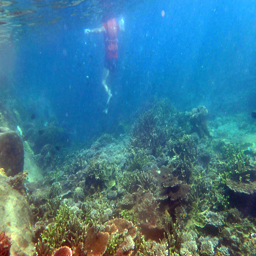

In [ ]:
imagem = cv2.imread('39.png')
cv2_imshow(imagem)
nova_imagem = correcao_cor(imagem)
nova_imagem = brilho_contraste(nova_imagem, 1.3, 1)
cv2_imshow(nova_imagem)
nova_imagem = transformacao_linear(imagem)
nova_imagem = brilho_contraste(nova_imagem, 1.3, 1)
cv2_imshow(nova_imagem)

In [ ]:
def filtro_media(imagem, n):
  inv_n = 1/(n**2)
  nova_imagem = np.ones([imagem.shape[0], imagem.shape[1]]).astype(int)
  for i in range(len(imagem)):
    for j in range(len(imagem[i])):
      soma = 0
      if (i + n >= len(imagem)):
        break
      for x in range(i, i + n):
        if (j + n >= len(imagem[i])):
          break
        for y in range(j, j + n):
          soma = soma + imagem[x][y]
      media = soma*inv_n
      x_y = ceil(n/2) - 2
      nova_imagem[x - x_y][y - x_y] = media
  return nova_imagem

In [ ]:
def filtro_mediana(imagem, n):
  nova_imagem = np.ones([imagem.shape[0], imagem.shape[1]]).astype(int)
  for i in range(len(imagem)):
    for j in range(len(imagem[i])):
      if (i + n >= len(imagem)):
        break
      pixels = []
      for x in range(i, i + n):
        if (j + n >= len(imagem[i])):
          break
        for y in range(j, j + n):
          pixels.append(imagem[x][y])
      pixels.sort()
      x_y = ceil(n/2) - 2
      if (len(pixels) != 0):
        nova_imagem[x - x_y][y - x_y] = pixels[ceil(len(pixels)/2) - 1]
  return nova_imagem

##Correção do gama

In [2]:
def correcao_gamma(image, gamma=1.0):
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	return cv2.LUT(image, table)

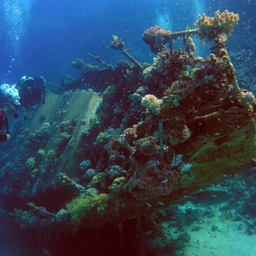

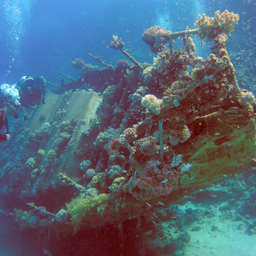

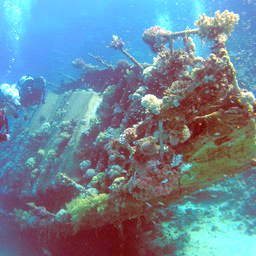

In [35]:
imagem = cv2.imread('28.png')
cv2_imshow(imagem)

nova_imagem_1 = correcao_gamma(imagem, 1.5)
nova_imagem_2 = brilho_contraste(nova_imagem_1, 1.3, 1)

cv2_imshow(nova_imagem_1)
cv2_imshow(nova_imagem_2)

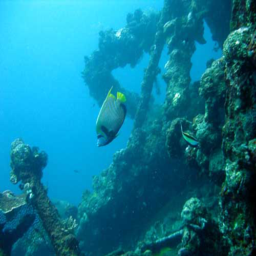

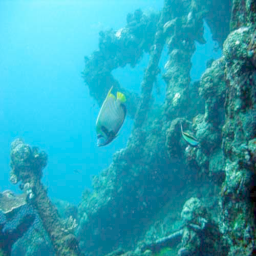

In [42]:
imagem = cv2.imread('25.png')
cv2_imshow(imagem)

nova_imagem = correcao_gamma(imagem, 1.8)

cv2_imshow(nova_imagem)